### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read in File and Clean Data

In [2]:
# Read CSV
csv_path = Path('../Resources/crypto_data.csv')
crypto_data = pd.read_csv(csv_path, index_col='data_date', parse_dates=True, infer_datetime_format=True)
crypto_data


,cryptocurrency,data_priceUsd,data_time,timestamp
data_date,,,,
2017-05-09,bitcoin,NaN,1.494288e+12,1.557285e+12
2017-05-10,bitcoin,1743.723523,1.494374e+12,NaN
2017-05-11,bitcoin,1828.678209,1.494461e+12,NaN
2017-05-12,bitcoin,1776.443919,1.494547e+12,NaN
2017-05-13,bitcoin,1714.964198,1.494634e+12,NaN
...,...,...,...,...
2019-05-03,litecoin,76.435295,1.556842e+12,NaN
2019-05-04,litecoin,77.011308,1.556928e+12,NaN
2019-05-05,litecoin,75.974875,1.557014e+12,NaN


In [3]:
# Drop all columns cryptocurrency and data_priceUsd
crypto_data = crypto_data.drop(columns=['data_time','timestamp'])
crypto_data

,cryptocurrency,data_priceUsd
data_date,,
2017-05-09,bitcoin,NaN
2017-05-10,bitcoin,1743.723523
2017-05-11,bitcoin,1828.678209
2017-05-12,bitcoin,1776.443919
2017-05-13,bitcoin,1714.964198
...,...,...
2019-05-03,litecoin,76.435295
2019-05-04,litecoin,77.011308
2019-05-05,litecoin,75.974875


In [4]:
# Sort the dates in ascending order
crypto_data = crypto_data.sort_index()
crypto_data

,cryptocurrency,data_priceUsd
data_date,,
2017-05-09,bitcoin,NaN
2017-05-09,litecoin,28.020288
2017-05-09,ripple,0.166990
2017-05-09,ethereum,84.915618
2017-05-10,litecoin,33.487730
...,...,...
2019-05-07,ripple,0.299862
2019-05-07,bitcoin,5869.538627
2019-05-07,ethereum,174.858535


In [9]:
# Are there any null values?
crypto_data.isnull().values.any()
# Where are the values missing values?
crypto_data.isnull()
# # Find out how many in each column 
crypto_data.isnull().sum() # add another sum() to chain to the total missing values


cryptocurrency     3
data_priceUsd     14
dtype: int64

In [10]:
# Check index of NA values
crypto_data = crypto_data.dropna()
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3539 entries, 2017-05-09 to 2019-05-07
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cryptocurrency  3539 non-null   object 
 1   data_priceUsd   3539 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.9+ KB


In [12]:
crypto_data.isnull().sum()
crypto_data.isnull().values.any()

False

### Group DataFrame and perform `count` aggregation

In [14]:
# Group by crypto data by cryptocurrency and perform count
crypto_data_grp = crypto_data.groupby('cryptocurrency').count() # add .count() to perform count
crypto_data_grp 

,data_priceUsd
cryptocurrency,
bitcoin,722
bitcoin-cash,639
ethereum,722
litecoin,728
ripple,728


### Group DataFrame without aggregate function

In [15]:
# Group by crypto data by cryptocurrency
crypto_data_grp = crypto_data.groupby('cryptocurrency')
crypto_data_grp.first() # add first() if you want to see the frist row of each group

,data_priceUsd
cryptocurrency,
bitcoin,1743.723523
bitcoin-cash,344.090146
ethereum,84.915618
litecoin,28.020288
ripple,0.166990


### Group DataFrame by `cryptocurrency` and calculate the average `data_priceUsd`

In [18]:
# Calculate average data_priceUsd for each crypto
crypto_data_mean = crypto_data.groupby('cryptocurrency').mean()
crypto_data_mean

,data_priceUsd
cryptocurrency,
bitcoin,19339.922660
bitcoin-cash,3476.844119
ethereum,1346.037491
litecoin,352.713468
ripple,2.999459


### Group by more than one column and calculate count

In [19]:
# Group by more than one column
multi_group = crypto_data.groupby(['cryptocurrency','data_priceUsd'])['data_priceUsd'].count()
multi_group

cryptocurrency  data_priceUsd
bitcoin         1714.964198      1
                1742.722945      1
                1743.723523      1
                1776.443919      1
                1789.278913      1
                                ..
ripple          2.507770         1
                2.665656         1
                2.667044         1
                2.709364         1
                2.999459         1
Name: data_priceUsd, Length: 3539, dtype: int64

In [20]:
multi_group = crypto_data.groupby(['cryptocurrency','data_priceUsd']).data_priceUsd.count()
multi_group

cryptocurrency  data_priceUsd
bitcoin         1714.964198      1
                1742.722945      1
                1743.723523      1
                1776.443919      1
                1789.278913      1
                                ..
ripple          2.507770         1
                2.665656         1
                2.667044         1
                2.709364         1
                2.999459         1
Name: data_priceUsd, Length: 3539, dtype: int64

### Group by more than one column, round price to two decimal places, and calculate count

In [22]:
# Group by more than one column after rounding to two decimal places
rounded_crypto_data = crypto_data.round({'data_priceUsd': 4})
rounded_crypto_data


,cryptocurrency,data_priceUsd
data_date,,
2017-05-09,litecoin,28.0203
2017-05-09,ripple,0.1670
2017-05-09,ethereum,84.9156
2017-05-10,litecoin,33.4877
2017-05-10,bitcoin,1743.7235
...,...,...
2019-05-07,ripple,0.2999
2019-05-07,bitcoin,5869.5386
2019-05-07,ethereum,174.8585


In [23]:
multi_group = rounded_crypto_data.groupby(['cryptocurrency','data_priceUsd'])['data_priceUsd'].count()
multi_group.head(50)

cryptocurrency  data_priceUsd
bitcoin         1714.9642        1
                1742.7229        1
                1743.7235        1
                1776.4439        1
                1789.2789        1
                1802.0351        1
                1828.6782        1
                1840.5017        1
                1932.2850        1
                1958.2490        1
                1988.9614        1
                2041.0432        1
                2046.8920        1
                2071.9572        1
                2096.0676        1
                2132.6159        1
                2155.2271        1
                2192.0010        1
                2212.0498        1
                2250.8593        1
                2288.2415        1
                2291.0771        1
                2327.1945        1
                2346.6942        1
                2354.4149        1
                2357.0754        1
                2372.2884        1
                2372.6741

### Compare single column grouping to multicolumn grouping

In [27]:
# Compare one column group with multiple column group
single_group = crypto_data.groupby('cryptocurrency')['data_priceUsd'].count()
single_group

cryptocurrency
bitcoin         1743.723523
bitcoin-cash     344.090146
ethereum          84.915618
litecoin          28.020288
ripple             0.166990
Name: data_priceUsd, dtype: float64

### Plot grouped data to generate more than one line on the same chart

cryptocurrency
bitcoin         AxesSubplot(0.125,0.2;0.775x0.68)
bitcoin-cash    AxesSubplot(0.125,0.2;0.775x0.68)
ethereum        AxesSubplot(0.125,0.2;0.775x0.68)
litecoin        AxesSubplot(0.125,0.2;0.775x0.68)
ripple          AxesSubplot(0.125,0.2;0.775x0.68)
Name: data_priceUsd, dtype: object

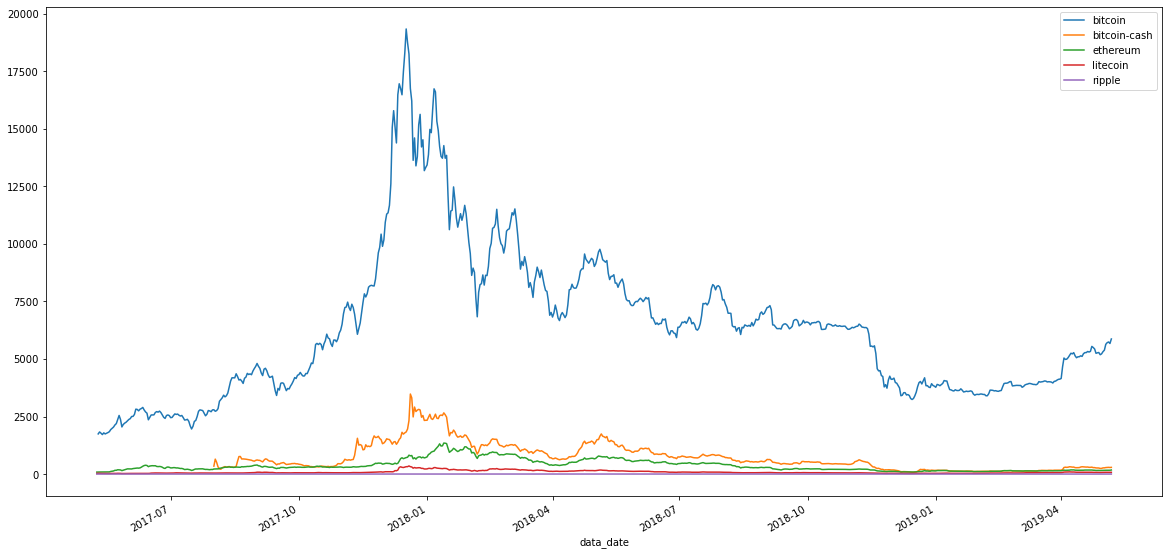

In [28]:
# Plot data_priceUsd for each crypto across time
grouped_cryptos = crypto_data.groupby('cryptocurrency')['data_priceUsd'].plot(legend=True, figsize=(20,10)) #add , figsize=(20,10) to see graph bigger
grouped_cryptos

In [29]:
# Bonus, print all multi items or single items group by 
single_group = crypto_data.groupby('cryptocurrency')['data_priceUsd']  
for key, item in single_group:
    print(single_group.get_group(key), "\n\n") # using the get_group() function

data_date
2017-05-10    1743.723523
2017-05-11    1828.678209
2017-05-12    1776.443919
2017-05-13    1714.964198
2017-05-14    1789.278913
                 ...     
2019-05-03    5635.648502
2019-05-04    5708.293373
2019-05-05    5738.591093
2019-05-06    5672.046269
2019-05-07    5869.538627
Name: data_priceUsd, Length: 722, dtype: float64 


data_date
2017-08-01    344.090146
2017-08-02    647.992009
2017-08-03    506.293007
2017-08-04    309.921863
2017-08-05    230.983515
                 ...    
2019-05-03    281.440627
2019-05-04    286.525161
2019-05-05    290.394285
2019-05-06    285.086507
2019-05-07    289.406309
Name: data_priceUsd, Length: 639, dtype: float64 


data_date
2017-05-09     84.915618
2017-05-10     88.177676
2017-05-11     88.432233
2017-05-12     88.646770
2017-05-13     86.503299
                 ...    
2019-05-03    164.020596
2019-05-04    163.025682
2019-05-05    161.789768
2019-05-06    165.506767
2019-05-07    174.858535
Name: data_priceUsd, Length: 7

In [30]:
multi_group = rounded_crypto_data.groupby(['cryptocurrency','data_priceUsd'])['data_priceUsd']
for key, item in multi_group:
    print(multi_group.get_group(key), "\n\n") # using the get_group() function


data_date
2017-05-13    1714.9642
Name: data_priceUsd, dtype: float64 


data_date
2017-05-15    1742.7229
Name: data_priceUsd, dtype: float64 


data_date
2017-05-10    1743.7235
Name: data_priceUsd, dtype: float64 


data_date
2017-05-12    1776.4439
Name: data_priceUsd, dtype: float64 


data_date
2017-05-14    1789.2789
Name: data_priceUsd, dtype: float64 


data_date
2017-05-17    1802.0351
Name: data_priceUsd, dtype: float64 


data_date
2017-05-11    1828.6782
Name: data_priceUsd, dtype: float64 


data_date
2017-05-18    1840.5017
Name: data_priceUsd, dtype: float64 


data_date
2017-05-19    1932.285
Name: data_priceUsd, dtype: float64 


data_date
2017-07-16    1958.249
Name: data_priceUsd, dtype: float64 


data_date
2017-05-20    1988.9614
Name: data_priceUsd, dtype: float64 


data_date
2017-05-21    2041.0432
Name: data_priceUsd, dtype: float64 


data_date
2017-05-27    2046.892
Name: data_priceUsd, dtype: float64 


data_date
2017-07-17    2071.9572
Name: data_priceUsd,

In [31]:
# One line of code using apply(print)
single_group = crypto_data.groupby('cryptocurrency')['data_priceUsd'].apply(print)

data_date
2017-05-10    1743.723523
2017-05-11    1828.678209
2017-05-12    1776.443919
2017-05-13    1714.964198
2017-05-14    1789.278913
                 ...     
2019-05-03    5635.648502
2019-05-04    5708.293373
2019-05-05    5738.591093
2019-05-06    5672.046269
2019-05-07    5869.538627
Name: bitcoin, Length: 722, dtype: float64
data_date
2017-08-01    344.090146
2017-08-02    647.992009
2017-08-03    506.293007
2017-08-04    309.921863
2017-08-05    230.983515
                 ...    
2019-05-03    281.440627
2019-05-04    286.525161
2019-05-05    290.394285
2019-05-06    285.086507
2019-05-07    289.406309
Name: bitcoin-cash, Length: 639, dtype: float64
data_date
2017-05-09     84.915618
2017-05-10     88.177676
2017-05-11     88.432233
2017-05-12     88.646770
2017-05-13     86.503299
                 ...    
2019-05-03    164.020596
2019-05-04    163.025682
2019-05-05    161.789768
2019-05-06    165.506767
2019-05-07    174.858535
Name: ethereum, Length: 722, dtype: float64

In [32]:
# one line of code using apply(print)
multi_group = rounded_crypto_data.groupby(['cryptocurrency','data_priceUsd'])['data_priceUsd'].apply(print)

data_date
2017-05-13    1714.9642
Name: (bitcoin, 1714.9642), dtype: float64
data_date
2017-05-15    1742.7229
Name: (bitcoin, 1742.7229), dtype: float64
data_date
2017-05-10    1743.7235
Name: (bitcoin, 1743.7235), dtype: float64
data_date
2017-05-12    1776.4439
Name: (bitcoin, 1776.4439), dtype: float64
data_date
2017-05-14    1789.2789
Name: (bitcoin, 1789.2789), dtype: float64
data_date
2017-05-17    1802.0351
Name: (bitcoin, 1802.0351), dtype: float64
data_date
2017-05-11    1828.6782
Name: (bitcoin, 1828.6782), dtype: float64
data_date
2017-05-18    1840.5017
Name: (bitcoin, 1840.5017), dtype: float64
data_date
2017-05-19    1932.285
Name: (bitcoin, 1932.285), dtype: float64
data_date
2017-07-16    1958.249
Name: (bitcoin, 1958.249), dtype: float64
data_date
2017-05-20    1988.9614
Name: (bitcoin, 1988.9614), dtype: float64
data_date
2017-05-21    2041.0432
Name: (bitcoin, 2041.0432), dtype: float64
data_date
2017-05-27    2046.892
Name: (bitcoin, 2046.892), dtype: float64
data_